In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install the package

In [2]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-qpxfvp8z
  Running command git clone --filter=blob:none --quiet https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-qpxfvp8z
  Resolved https://github.com/divamgupta/image-segmentation-keras to commit 750a44ca16c0ca3355c9486026377a239635df4d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.7 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34604 sha256=dd37042dd92f703b55d1c88836b995733ef82f57ea03e48feb8a68060b1d91be
  Stored in directory: /tmp/pip-ephem-wheel-cache-jsfys4pa/wheels/90/6c/b5/65b1374338021c45e3dc20a8074500b9a0100e9411697f046f
Successfully built keras-segmentation
  Attempting 

### Initialize the model

In [3]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=3 ,  input_height=640, input_width=640  )


58889256/58889256 [==============================] - 2s 0us/step


### Train the model

In [4]:
model.train(
    train_images =  "/content/drive/MyDrive/Colab_Notebooks/DL_course/Examen_3/Tennis_semantic.v1i.png-mask-semantic/images_prepped_train/",
    train_annotations = "/content/drive/MyDrive/Colab_Notebooks/DL_course/Examen_3/Tennis_semantic.v1i.png-mask-semantic/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5  
)

Verifying training dataset


100%|██████████| 561/561 [02:43<00:00,  3.42it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 0.1544 - accuracy: 0.9575
Epoch 1: saving model to /tmp/vgg_unet_1.00001
512/512 [==============================] - 39s 54ms/step - loss: 0.1544 - accuracy: 0.9575
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9944
Epoch 2: saving model to /tmp/vgg_unet_1.00002
512/512 [==============================] - 27s 53ms/step - loss: 0.0201 - accuracy: 0.9944
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9955
Epoch 3: saving model to /tmp/vgg_unet_1.00003
512/512 [==============================] - 27s 53ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9961
Epoch 4: saving model to /tmp/vgg_unet_1.00004
512/512 [==============================] - 27s 53ms/step - loss: 0.0119 - accuracy: 0.9961
Epoch 5/5
512/512 [==============================

In [5]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/Colab_Notebooks/DL_course/Examen_3/Tennis_semantic.v1i.png-mask-semantic/images_prepped_test/test1.jpg",
    out_fname="/tmp/out.png"
)

1/1 [==============================] - 1s 1s/step


In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

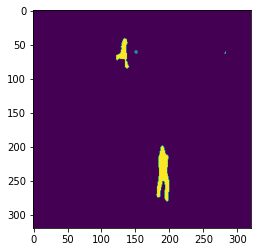

In [7]:
plt.imshow(out)

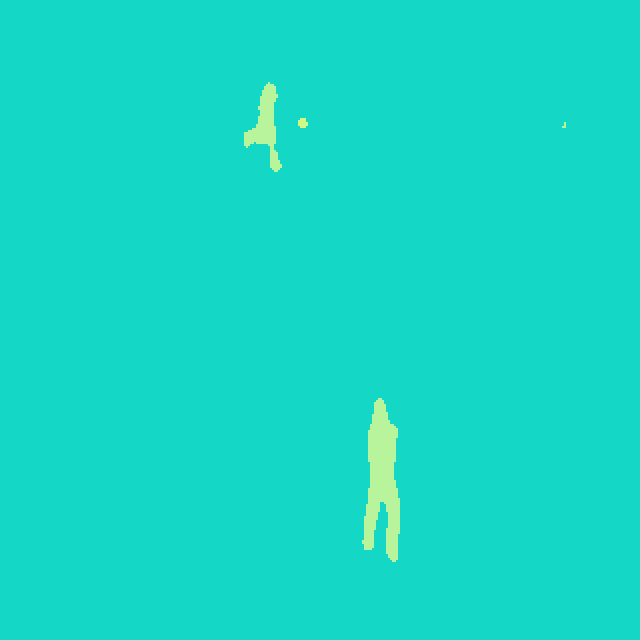

In [8]:
from IPython.display import Image
Image('/tmp/out.png')

In [9]:
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/Colab_Notebooks/DL_course/Examen_3/Tennis_semantic.v1i.png-mask-semantic/images_prepped_test/test1.jpg",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "background", "Ball", "Tennis-player"]

)

1/1 [==============================] - 0s 23ms/step


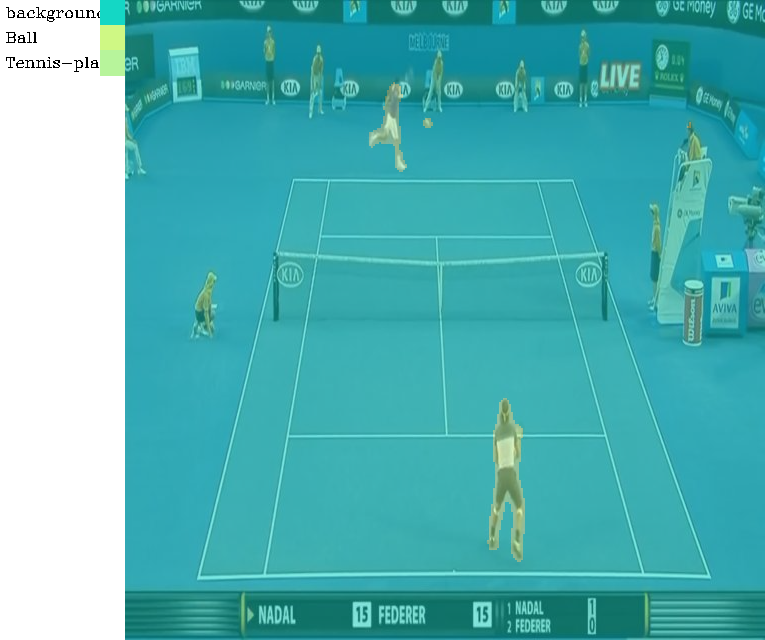

In [10]:
from IPython.display import Image
Image('/tmp/out.png')

In [11]:
# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/Colab_Notebooks/DL_course/Examen_3/Tennis_semantic.v1i.png-mask-semantic/images_prepped_test/"  , annotations_dir="/content/drive/MyDrive/Colab_Notebooks/DL_course/Examen_3/Tennis_semantic.v1i.png-mask-semantic/annotations_prepped_test/" ) )

0it [00:00, ?it/s]

1/1 [==============================] - 0s 21ms/step


1it [00:00,  1.53it/s]

1/1 [==============================] - 0s 28ms/step


2it [00:01,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


3it [00:02,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


4it [00:02,  1.68it/s]

1/1 [==============================] - 0s 23ms/step


5it [00:03,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


6it [00:03,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


7it [00:03,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


8it [00:04,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


9it [00:04,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


10it [00:04,  2.60it/s]

1/1 [==============================] - 0s 21ms/step


11it [00:05,  2.65it/s]

1/1 [==============================] - 0s 20ms/step


12it [00:05,  2.70it/s]

1/1 [==============================] - 0s 20ms/step


13it [00:06,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


14it [00:06,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


15it [00:06,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


16it [00:07,  2.83it/s]

1/1 [==============================] - 0s 21ms/step


17it [00:07,  2.85it/s]

1/1 [==============================] - 0s 22ms/step


18it [00:07,  2.71it/s]

1/1 [==============================] - 0s 20ms/step


19it [00:08,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


20it [00:08,  2.67it/s]

1/1 [==============================] - 0s 21ms/step


21it [00:08,  2.70it/s]

1/1 [==============================] - 0s 23ms/step


22it [00:09,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


23it [00:09,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


24it [00:09,  2.79it/s]

1/1 [==============================] - 0s 20ms/step


25it [00:10,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


26it [00:10,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


27it [00:11,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


28it [00:11,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


29it [00:11,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


30it [00:12,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


31it [00:12,  2.79it/s]

1/1 [==============================] - 0s 21ms/step


32it [00:12,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


33it [00:13,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


34it [00:13,  2.80it/s]

1/1 [==============================] - 0s 20ms/step


35it [00:13,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


36it [00:14,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


37it [00:14,  2.83it/s]

1/1 [==============================] - 0s 21ms/step


38it [00:15,  2.71it/s]

1/1 [==============================] - 0s 21ms/step


39it [00:15,  2.83it/s]

1/1 [==============================] - 0s 20ms/step


40it [00:15,  2.79it/s]

1/1 [==============================] - 0s 21ms/step


41it [00:16,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


42it [00:16,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


43it [00:16,  2.77it/s]

1/1 [==============================] - 0s 21ms/step


44it [00:17,  2.75it/s]

1/1 [==============================] - 0s 21ms/step


45it [00:17,  2.76it/s]

1/1 [==============================] - 0s 21ms/step


46it [00:17,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


47it [00:18,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


48it [00:18,  2.79it/s]

1/1 [==============================] - 0s 36ms/step


49it [00:18,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


50it [00:19,  2.84it/s]

1/1 [==============================] - 0s 23ms/step


51it [00:19,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


52it [00:20,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


53it [00:20,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


54it [00:20,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


55it [00:21,  2.95it/s]

1/1 [==============================] - 0s 21ms/step


56it [00:21,  2.94it/s]

1/1 [==============================] - 0s 21ms/step


57it [00:21,  2.92it/s]

1/1 [==============================] - 0s 22ms/step


58it [00:22,  2.99it/s]

1/1 [==============================] - 0s 21ms/step


59it [00:22,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


60it [00:22,  2.87it/s]

1/1 [==============================] - 0s 23ms/step


61it [00:23,  2.86it/s]

1/1 [==============================] - 0s 21ms/step


62it [00:23,  2.95it/s]

1/1 [==============================] - 0s 21ms/step


63it [00:23,  2.86it/s]

1/1 [==============================] - 0s 21ms/step


64it [00:24,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


65it [00:24,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


66it [00:25,  2.60it/s]

1/1 [==============================] - 0s 21ms/step


67it [00:25,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


68it [00:25,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


69it [00:26,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


70it [00:26,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


71it [00:26,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


72it [00:27,  2.77it/s]

1/1 [==============================] - 0s 21ms/step


73it [00:27,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


74it [00:27,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


75it [00:28,  2.97it/s]

1/1 [==============================] - 0s 21ms/step


76it [00:28,  2.96it/s]

1/1 [==============================] - 0s 21ms/step


77it [00:28,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


78it [00:29,  2.86it/s]

1/1 [==============================] - 0s 21ms/step


79it [00:29,  2.90it/s]

1/1 [==============================] - 0s 21ms/step


80it [00:29,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


81it [00:30,  2.82it/s]

1/1 [==============================] - 0s 20ms/step


82it [00:30,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


83it [00:31,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


84it [00:31,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


85it [00:31,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


86it [00:32,  3.03it/s]

1/1 [==============================] - 0s 21ms/step


87it [00:32,  2.95it/s]

1/1 [==============================] - 0s 21ms/step


88it [00:32,  2.94it/s]

1/1 [==============================] - 0s 21ms/step


89it [00:33,  2.94it/s]

1/1 [==============================] - 0s 21ms/step


90it [00:33,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


91it [00:33,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


92it [00:34,  2.88it/s]

1/1 [==============================] - 0s 23ms/step


93it [00:34,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


94it [00:34,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


95it [00:35,  2.90it/s]

1/1 [==============================] - 0s 22ms/step


96it [00:35,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


97it [00:35,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


98it [00:36,  2.98it/s]

1/1 [==============================] - 0s 21ms/step


99it [00:36,  2.99it/s]

1/1 [==============================] - 0s 21ms/step


100it [00:36,  2.96it/s]

1/1 [==============================] - 0s 21ms/step


101it [00:37,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


102it [00:37,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


103it [00:38,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


104it [00:38,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


105it [00:38,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


106it [00:39,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


107it [00:39,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


108it [00:39,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


109it [00:40,  2.73it/s]

1/1 [==============================] - 0s 20ms/step


110it [00:40,  2.72it/s]

1/1 [==============================] - 0s 23ms/step


111it [00:40,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


112it [00:41,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


113it [00:41,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


114it [00:41,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


115it [00:42,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


116it [00:42,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


117it [00:43,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


118it [00:43,  2.93it/s]

1/1 [==============================] - 0s 21ms/step


119it [00:43,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


120it [00:44,  2.80it/s]

1/1 [==============================] - 0s 24ms/step


121it [00:44,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


122it [00:44,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


123it [00:45,  2.69it/s]

1/1 [==============================] - 0s 21ms/step


124it [00:45,  2.74it/s]

1/1 [==============================] - 0s 21ms/step


125it [00:45,  2.78it/s]

1/1 [==============================] - 0s 21ms/step


126it [00:46,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


127it [00:46,  2.75it/s]

1/1 [==============================] - 0s 21ms/step


128it [00:46,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


129it [00:47,  2.91it/s]

1/1 [==============================] - 0s 21ms/step


130it [00:47,  2.88it/s]

1/1 [==============================] - 0s 22ms/step


131it [00:47,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


132it [00:48,  2.83it/s]

1/1 [==============================] - 0s 22ms/step


133it [00:48,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


134it [00:49,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


135it [00:49,  2.84it/s]

1/1 [==============================] - 0s 21ms/step


136it [00:49,  2.91it/s]

1/1 [==============================] - 0s 21ms/step


137it [00:50,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


138it [00:50,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


139it [00:50,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


140it [00:51,  2.88it/s]

1/1 [==============================] - 0s 21ms/step


141it [00:51,  2.89it/s]

1/1 [==============================] - 0s 22ms/step


142it [00:51,  2.92it/s]

1/1 [==============================] - 0s 21ms/step


143it [00:52,  2.71it/s]

1/1 [==============================] - 0s 21ms/step


144it [00:52,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


145it [00:52,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


146it [00:53,  2.72it/s]

1/1 [==============================] - 0s 21ms/step


147it [00:53,  2.80it/s]

1/1 [==============================] - 0s 22ms/step


148it [00:54,  2.83it/s]

1/1 [==============================] - 0s 20ms/step


149it [00:54,  2.83it/s]

1/1 [==============================] - 0s 21ms/step


150it [00:54,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


151it [00:55,  2.87it/s]

1/1 [==============================] - 0s 21ms/step


152it [00:55,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


153it [00:55,  2.77it/s]

1/1 [==============================] - 0s 20ms/step


154it [00:56,  2.72it/s]

1/1 [==============================] - 0s 21ms/step


155it [00:56,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


156it [00:56,  2.83it/s]

1/1 [==============================] - 0s 20ms/step


157it [00:57,  2.84it/s]

1/1 [==============================] - 0s 21ms/step


158it [00:57,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


159it [00:57,  2.85it/s]

1/1 [==============================] - 0s 21ms/step


160it [00:58,  2.78it/s]

1/1 [==============================] - 0s 20ms/step


161it [00:58,  2.79it/s]

1/1 [==============================] - 0s 21ms/step


162it [00:59,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


163it [00:59,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


164it [00:59,  2.62it/s]

1/1 [==============================] - 0s 20ms/step


165it [01:00,  2.65it/s]

1/1 [==============================] - 0s 21ms/step


166it [01:00,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


167it [01:01,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


168it [01:01,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


169it [01:01,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


170it [01:02,  2.73it/s]

1/1 [==============================] - 0s 21ms/step


171it [01:02,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


172it [01:02,  2.84it/s]

1/1 [==============================] - 0s 24ms/step


173it [01:03,  2.82it/s]

1/1 [==============================] - 0s 21ms/step


174it [01:03,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


175it [01:04,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


176it [01:04,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


177it [01:05,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


178it [01:05,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


179it [01:05,  2.71it/s]

1/1 [==============================] - 0s 27ms/step


180it [01:06,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


181it [01:06,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


182it [01:06,  2.75it/s]

1/1 [==============================] - 0s 21ms/step


183it [01:07,  2.81it/s]

1/1 [==============================] - 0s 21ms/step


184it [01:07,  2.89it/s]

1/1 [==============================] - 0s 21ms/step


185it [01:07,  2.91it/s]

1/1 [==============================] - 0s 21ms/step


186it [01:08,  2.92it/s]

1/1 [==============================] - 0s 20ms/step


187it [01:08,  2.73it/s]

{'frequency_weighted_IU': 0.9914563059441768, 'mean_IU': 0.578443419526438, 'class_wise_IU': array([0.99555543, 0.13085339, 0.60892144])}
